## Obtain Data

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import json
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
url = "https://stats.nba.com/stats/teamgamelogs?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlusMinus=N&Rank=N&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&VsConference=&VsDivision="

### Load Traditional & Advanced Stats (JSON)

In [5]:
# url endpoint: 
# https://stats.nba.com/stats/teamgamelogs?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlusMinus=N&Rank=N&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&VsConference=&VsDivision=


nba_first_half = json.load(open('data/first-half-traditional.json'))
nba_third_q = json.load(open('data/third-quarter-traditional.json'))

#### Extract Headers/Columns

In [6]:
col_trad = nba_first_half['resultSets'][0]['headers']
print(col_trad)

['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK']


#### Extract Rows

In [8]:
rows_half = nba_first_half['resultSets'][0]['rowSet']
rows_third = nba_third_q['resultSets'][0]['rowSet']
rows_half[:2]

[['2018-19',
  1610612746,
  'LAC',
  'LA Clippers',
  '0021801229',
  '2019-04-10T00:00:00',
  'LAC vs. UTA',
  'W',
  24.0,
  27,
  46,
  0.587,
  8,
  14,
  0.571,
  8,
  13,
  0.615,
  4,
  18,
  22,
  21,
  9.0,
  4,
  2,
  3,
  11,
  11,
  70,
  4.0,
  1,
  1,
  1,
  1,
  1,
  98,
  989,
  127,
  306,
  1458,
  101,
  1035,
  595,
  2101,
  1372,
  1002,
  1267,
  16,
  1791,
  833,
  1080,
  1382,
  1572,
  614,
  107,
  815],
 ['2018-19',
  1610612765,
  'DET',
  'Detroit Pistons',
  '0021801223',
  '2019-04-10T00:00:00',
  'DET @ NYK',
  'W',
  24.0,
  22,
  44,
  0.5,
  6,
  17,
  0.353,
  15,
  16,
  0.938,
  7,
  21,
  28,
  10,
  6.0,
  2,
  2,
  1,
  9,
  11,
  65,
  24.0,
  1,
  1,
  1,
  1,
  1,
  886,
  1473,
  740,
  818,
  769,
  1215,
  110,
  283,
  332,
  417,
  389,
  237,
  1849,
  690,
  1840,
  1080,
  246,
  862,
  614,
  331,
  31]]

#### Create Initial DataFrames

In [9]:
nba_half_df = pd.DataFrame(rows_half, columns=col_trad)
nba_third_df = pd.DataFrame(rows_third, columns=col_trad)

In [10]:
nba_half_df.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,2018-19,1610612746,LAC,LA Clippers,0021801229,2019-04-10T00:00:00,LAC vs. UTA,W,24.0,27,...,1267,16,1791,833,1080,1382,1572,614,107,815
1,2018-19,1610612765,DET,Detroit Pistons,0021801223,2019-04-10T00:00:00,DET @ NYK,W,24.0,22,...,237,1849,690,1840,1080,246,862,614,331,31
2,2018-19,1610612744,GSW,Golden State Warriors,0021801225,2019-04-10T00:00:00,GSW @ MEM,L,24.0,26,...,2457,41,76,1840,1080,1,1848,1229,180,2312
3,2018-19,1610612741,CHI,Chicago Bulls,0021801224,2019-04-10T00:00:00,CHI @ PHI,L,24.0,17,...,2037,2204,417,1840,1673,2417,13,2418,2320,2358
4,2018-19,1610612758,SAC,Sacramento Kings,0021801230,2019-04-10T00:00:00,SAC @ POR,L,24.0,32,...,1267,132,20,2223,2216,246,533,1229,2,25


In [11]:
nba_third_df.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,2018-19,1610612762,UTA,Utah Jazz,0021801229,2019-04-10T00:00:00,UTA @ LAC,L,12.0,12,...,186,337,313,1415,325,1,1407,646,621,1292
1,2018-19,1610612751,BKN,Brooklyn Nets,0021801221,2019-04-10T00:00:00,BKN vs. MIA,W,12.0,10,...,22,337,313,2081,875,1587,171,1574,920,625
2,2018-19,1610612753,ORL,Orlando Magic,0021801222,2019-04-10T00:00:00,ORL @ CHA,W,12.0,14,...,2175,1426,69,770,325,1,31,1574,216,625
3,2018-19,1610612743,DEN,Denver Nuggets,0021801228,2019-04-10T00:00:00,DEN vs. MIN,W,12.0,9,...,765,1426,732,1415,875,1,429,1574,1975,1950
4,2018-19,1610612765,DET,Detroit Pistons,0021801223,2019-04-10T00:00:00,DET @ NYK,W,12.0,10,...,314,165,1252,343,1727,1,1816,2033,1274,315


### Merging, Cleaning, & Dropping Data

#### Drop Extra Columns (anything with '_RANK')

In [12]:
nba_half_df = nba_half_df[nba_half_df.columns.drop(list(nba_half_df.filter(regex='_RANK')))]
nba_third_df = nba_third_df[nba_third_df.columns.drop(list(nba_third_df.filter(regex='_RANK')))]

In [13]:
nba_third_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 30 columns):
SEASON_YEAR          2460 non-null object
TEAM_ID              2460 non-null int64
TEAM_ABBREVIATION    2460 non-null object
TEAM_NAME            2460 non-null object
GAME_ID              2460 non-null object
GAME_DATE            2460 non-null object
MATCHUP              2460 non-null object
WL                   2460 non-null object
MIN                  2460 non-null float64
FGM                  2460 non-null int64
FGA                  2460 non-null int64
FG_PCT               2460 non-null float64
FG3M                 2460 non-null int64
FG3A                 2460 non-null int64
FG3_PCT              2460 non-null float64
FTM                  2460 non-null int64
FTA                  2460 non-null int64
FT_PCT               2460 non-null float64
OREB                 2460 non-null int64
DREB                 2460 non-null int64
REB                  2460 non-null int64
AST              

In [14]:
nba_third_df = nba_third_df.add_prefix("3Q_")

#### Rename 3Q Stats for Merging

In [15]:
nba_third_df = nba_third_df.rename(index=str, columns={"3Q_SEASON_YEAR": "SEASON_YEAR", 
                                        "3Q_TEAM_ID": "TEAM_ID",
                                       "3Q_TEAM_ABBREVIATION": "TEAM_ABBREVIATION",
                                        "3Q_TEAM_NAME": "TEAM_NAME",
                                        "3Q_GAME_ID": "GAME_ID",
                                        "3Q_MATCHUP": "MATCHUP",
                                        "3Q_WL": "WL",
                                        "3Q_GAME_DATE": "GAME_DATE"
                                       })

#### Merge DataFrames

The nba.stats.com serves advanced and traditional stats from different endpoints, so they will have to be merged.  Rows will be combined on **GAME_ID** and **TEAM_ABBREVIATION** since each game will have a unique identifier, and each game has two rows of data (one for each team).

The preliminary list of matching columns is:
    - SEASON_YEAR
    - MIN
    - TEAM_ID
    - TEAM_ABBREVIATION
    - TEAM_NAME
    - GAME_ID
    - GAME_DATE
    - MATCHUP
    - WL

In [16]:
dup_columns = ["SEASON_YEAR", "TEAM_ID", "TEAM_ABBREVIATION", 
               "TEAM_NAME", "GAME_ID", "GAME_DATE", "MATCHUP", "WL"]
three_q = nba_half_df.merge(nba_third_df, how='inner', on=dup_columns)

In [17]:
three_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 52 columns):
SEASON_YEAR          2460 non-null object
TEAM_ID              2460 non-null int64
TEAM_ABBREVIATION    2460 non-null object
TEAM_NAME            2460 non-null object
GAME_ID              2460 non-null object
GAME_DATE            2460 non-null object
MATCHUP              2460 non-null object
WL                   2460 non-null object
MIN                  2460 non-null float64
FGM                  2460 non-null int64
FGA                  2460 non-null int64
FG_PCT               2460 non-null float64
FG3M                 2460 non-null int64
FG3A                 2460 non-null int64
FG3_PCT              2460 non-null float64
FTM                  2460 non-null int64
FTA                  2460 non-null int64
FT_PCT               2460 non-null float64
OREB                 2460 non-null int64
DREB                 2460 non-null int64
REB                  2460 non-null int64
AST              

#### Adding Half Time Stats + 3rd Quarter Stats

In [18]:
columns_to_add = ['MIN', 'FGM', 'FGA', 'FG3M',  'FG3A', 'FTM',  'FTA',  
                  'OREB',  'DREB',  'REB',  'AST',  'TOV',  'STL',  
                  'BLK',  'BLKA',  'PF',  'PFD',  'PTS', 'PLUS_MINUS']

print(three_q.iloc[0])
for col in columns_to_add:
    three_q[col] = three_q[col] + three_q["3Q_" + col]

print(three_q.iloc[0])

SEASON_YEAR                      2018-19
TEAM_ID                       1610612746
TEAM_ABBREVIATION                    LAC
TEAM_NAME                    LA Clippers
GAME_ID                       0021801229
GAME_DATE            2019-04-10T00:00:00
MATCHUP                      LAC vs. UTA
WL                                     W
MIN                                   24
FGM                                   27
FGA                                   46
FG_PCT                             0.587
FG3M                                   8
FG3A                                  14
FG3_PCT                            0.571
FTM                                    8
FTA                                   13
FT_PCT                             0.615
OREB                                   4
DREB                                  18
REB                                   22
AST                                   21
TOV                                    9
STL                                    4
BLK             

#### Calculating FG, FG3, & FT% with Combined Stats

In [19]:
three_q["FG_PCT"] = three_q["FGM"] / three_q["FGA"]
three_q["FG3_PCT"] = three_q["FG3M"] / three_q["FG3A"]
three_q["FT_PCT"] = three_q["FTM"] / three_q["FTA"]

print(three_q.iloc[0])

SEASON_YEAR                      2018-19
TEAM_ID                       1610612746
TEAM_ABBREVIATION                    LAC
TEAM_NAME                    LA Clippers
GAME_ID                       0021801229
GAME_DATE            2019-04-10T00:00:00
MATCHUP                      LAC vs. UTA
WL                                     W
MIN                                   36
FGM                                   38
FGA                                   70
FG_PCT                          0.542857
FG3M                                  10
FG3A                                  20
FG3_PCT                              0.5
FTM                                   16
FTA                                   22
FT_PCT                          0.727273
OREB                                   7
DREB                                  27
REB                                   34
AST                                   27
TOV                                   10
STL                                    4
BLK             

#### Dropping Old 3Q Columns

In [20]:
columns_to_drop = ['3Q_MIN', '3Q_FGM', '3Q_FGA', '3Q_FG_PCT', 
                   '3Q_FG3M',  '3Q_FG3A', '3Q_FG3_PCT' , 
                   '3Q_FTM',  '3Q_FTA', '3Q_FT_PCT',
                  '3Q_OREB',  '3Q_DREB',  '3Q_REB',  '3Q_AST',  '3Q_TOV',  '3Q_STL',  
                  '3Q_BLK',  '3Q_BLKA',  '3Q_PF',  '3Q_PFD',  '3Q_PTS', '3Q_PLUS_MINUS']

three_q.drop(columns_to_drop, axis=1, inplace=True)

In [21]:
three_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2460 entries, 0 to 2459
Data columns (total 30 columns):
SEASON_YEAR          2460 non-null object
TEAM_ID              2460 non-null int64
TEAM_ABBREVIATION    2460 non-null object
TEAM_NAME            2460 non-null object
GAME_ID              2460 non-null object
GAME_DATE            2460 non-null object
MATCHUP              2460 non-null object
WL                   2460 non-null object
MIN                  2460 non-null float64
FGM                  2460 non-null int64
FGA                  2460 non-null int64
FG_PCT               2460 non-null float64
FG3M                 2460 non-null int64
FG3A                 2460 non-null int64
FG3_PCT              2460 non-null float64
FTM                  2460 non-null int64
FTA                  2460 non-null int64
FT_PCT               2459 non-null float64
OREB                 2460 non-null int64
DREB                 2460 non-null int64
REB                  2460 non-null int64
AST              

#### Set Home Team Attribute (Matchup has "vs.")

In [22]:
# 1 = HOME, 0 = AWAY
three_q['HOME'] = pd.np.where(three_q.MATCHUP.str.contains("vs."), 1, 0)

In [23]:
three_q.describe()

,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,HOME
count,2.460000e+03,2460.0,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1.610613e+09,36.0,31.258537,67.415041,0.464752,8.563008,23.789024,0.359516,12.544309,16.273171,...,18.878862,10.631707,5.817886,3.689024,3.689024,14.980081,14.980488,83.624390,0.000000,0.500000
std,8.657201e+00,0.0,4.361444,5.604972,0.061031,3.172372,5.862582,0.100391,4.968963,5.966711,...,4.337055,3.349041,2.527314,2.111290,2.111290,3.405138,3.405678,10.493611,13.559442,0.500102
min,1.610613e+09,36.0,17.000000,48.000000,0.283784,1.000000,7.000000,0.047619,0.000000,0.000000,...,6.000000,1.000000,0.000000,0.000000,0.000000,6.000000,6.000000,53.000000,-40.000000,0.000000
25%,1.610613e+09,36.0,28.000000,64.000000,0.424114,6.000000,20.000000,0.294118,9.000000,12.000000,...,16.000000,8.000000,4.000000,2.000000,2.000000,13.000000,13.000000,77.000000,-9.000000,0.000000
50%,1.610613e+09,36.0,31.000000,67.000000,0.463768,8.000000,23.000000,0.357143,12.000000,16.000000,...,19.000000,10.000000,6.000000,3.000000,3.000000,15.000000,15.000000,84.000000,0.000000,0.500000
75%,1.610613e+09,36.0,34.000000,71.000000,0.506898,11.000000,28.000000,0.421559,15.000000,20.000000,...,22.000000,13.000000,7.000000,5.000000,5.000000,17.000000,17.000000,91.000000,9.000000,1.000000
max,1.610613e+09,36.0,47.000000,86.000000,0.689655,24.000000,50.000000,0.933333,32.000000,37.000000,...,35.000000,25.000000,16.000000,14.000000,14.000000,28.000000,28.000000,125.000000,40.000000,1.000000


### Combine Away Row Data as "OPP_[STAT]" in Home Row Data

In [24]:
# positions home/away rows for each game together
three_q.sort_values(['GAME_ID'], inplace=True)

In [25]:
three_q.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,HOME
2459,2018-19,1610612738,BOS,Boston Celtics,0021800001,2018-10-16T00:00:00,BOS vs. PHI,W,36.0,31,...,15,10.0,6,4,4,13,14,77,11.0,1
2457,2018-19,1610612755,PHI,Philadelphia 76ers,0021800001,2018-10-16T00:00:00,PHI @ BOS,L,36.0,27,...,14,14.0,7,4,4,14,13,66,-11.0,0
2456,2018-19,1610612760,OKC,Oklahoma City Thunder,0021800002,2018-10-16T00:00:00,OKC @ GSW,L,36.0,27,...,17,11.0,11,4,4,16,19,79,-4.0,0
2458,2018-19,1610612744,GSW,Golden State Warriors,0021800002,2018-10-16T00:00:00,GSW vs. OKC,W,36.0,32,...,22,17.0,5,4,4,19,16,83,4.0,1
2436,2018-19,1610612766,CHA,Charlotte Hornets,0021800003,2018-10-17T00:00:00,CHA vs. MIL,L,36.0,32,...,17,8.0,7,3,3,15,17,83,-10.0,1


In [26]:
three_q['FT_PCT'].fillna(0).astype(np.int64)

2459    0
2457    0
2456    0
2458    0
2436    0
2449    0
2443    0
2442    0
2435    0
2453    0
2447    0
2444    0
2440    0
2445    0
2452    0
2438    0
2434    0
2455    0
2454    0
2448    0
2441    0
2451    0
2450    0
2439    0
2437    0
2446    0
2433    0
2430    0
2431    0
2428    0
       ..
36      0
32      0
35      0
42      0
29      0
39      0
28      0
43      0
5       0
19      0
10      0
6       0
20      0
8       0
14      0
1       0
3       0
12      0
2       0
17      0
11      0
7       0
15      0
9       0
13      0
16      0
21      0
0       0
4       0
18      0
Name: FT_PCT, Length: 2460, dtype: int64

In [27]:
three_q['FT_PCT'].describe()

count    2459.000000
mean        0.770909
std         0.120192
min         0.181818
25%         0.695652
50%         0.777778
75%         0.857143
max         1.000000
Name: FT_PCT, dtype: float64

In [28]:
three_q_df = three_q.copy()

opp_columns = ['MIN', 'FGM', 'FGA', 'FG3M',  'FG3A', 'FTM',  'FTA',  
                  'OREB',  'DREB',  'REB',  'AST',  'TOV',  'STL',  
                  'BLK',  'BLKA',  'PF',  'PFD',  'PTS', 'PLUS_MINUS']

for i in range(0, len(three_q_df), 2):
    gid = three_q_df.iloc[i]['GAME_ID']
    for col in opp_columns:
        away_stat = three_q_df.loc[(three_q_df['GAME_ID'] == gid) & (three_q_df['HOME'] == 0), col].values[0]
        new_col = "OPP_" + col
        three_q_df.loc[(three_q_df['GAME_ID'] == gid) & (three_q_df['HOME'] == 1), new_col] = away_stat

In [29]:
three_q_df.head(10)

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,OPP_PLUS_MINUS
2459,2018-19,1610612738,BOS,Boston Celtics,0021800001,2018-10-16T00:00:00,BOS vs. PHI,W,36.0,31,...,39.0,14.0,14.0,7.0,4.0,4.0,14.0,13.0,66.0,-11.0
2457,2018-19,1610612755,PHI,Philadelphia 76ers,0021800001,2018-10-16T00:00:00,PHI @ BOS,L,36.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,2018-19,1610612760,OKC,Oklahoma City Thunder,0021800002,2018-10-16T00:00:00,OKC @ GSW,L,36.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2458,2018-19,1610612744,GSW,Golden State Warriors,0021800002,2018-10-16T00:00:00,GSW vs. OKC,W,36.0,32,...,34.0,17.0,11.0,11.0,4.0,4.0,16.0,19.0,79.0,-4.0
2436,2018-19,1610612766,CHA,Charlotte Hornets,0021800003,2018-10-17T00:00:00,CHA vs. MIL,L,36.0,32,...,46.0,22.0,16.0,3.0,3.0,3.0,17.0,15.0,93.0,10.0
2449,2018-19,1610612749,MIL,Milwaukee Bucks,0021800003,2018-10-17T00:00:00,MIL @ CHA,W,36.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2443,2018-19,1610612751,BKN,Brooklyn Nets,0021800004,2018-10-17T00:00:00,BKN @ DET,L,36.0,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2442,2018-19,1610612765,DET,Detroit Pistons,0021800004,2018-10-17T00:00:00,DET vs. BKN,W,36.0,31,...,30.0,23.0,15.0,6.0,4.0,2.0,20.0,15.0,76.0,-7.0
2435,2018-19,1610612754,IND,Indiana Pacers,0021800005,2018-10-17T00:00:00,IND vs. MEM,W,36.0,32,...,21.0,12.0,9.0,8.0,2.0,7.0,14.0,16.0,58.0,-18.0
2453,2018-19,1610612763,MEM,Memphis Grizzlies,0021800005,2018-10-17T00:00:00,MEM @ IND,L,36.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
three_q_df.isna().any()

SEASON_YEAR          False
TEAM_ID              False
TEAM_ABBREVIATION    False
TEAM_NAME            False
GAME_ID              False
GAME_DATE            False
MATCHUP              False
WL                   False
MIN                  False
FGM                  False
FGA                  False
FG_PCT               False
FG3M                 False
FG3A                 False
FG3_PCT              False
FTM                  False
FTA                  False
FT_PCT                True
OREB                 False
DREB                 False
REB                  False
AST                  False
TOV                  False
STL                  False
BLK                  False
BLKA                 False
PF                   False
PFD                  False
PTS                  False
PLUS_MINUS           False
HOME                 False
OPP_MIN               True
OPP_FGM               True
OPP_FGA               True
OPP_FG3M              True
OPP_FG3A              True
OPP_FTM               True
O

In [31]:
null_columns = three_q_df.columns[three_q_df.isnull().any()]
print(three_q_df[three_q_df['FT_PCT'].isnull()][null_columns])

      FT_PCT  OPP_MIN  OPP_FGM  OPP_FGA  OPP_FG3M  OPP_FG3A  OPP_FTM  OPP_FTA  \
1751     NaN     36.0     35.0     59.0       8.0      13.0     10.0     16.0   

      OPP_OREB  OPP_DREB  OPP_REB  OPP_AST  OPP_TOV  OPP_STL  OPP_BLK  \
1751       2.0      23.0     25.0     25.0      7.0      5.0      1.0   

      OPP_BLKA  OPP_PF  OPP_PFD  OPP_PTS  OPP_PLUS_MINUS  
1751       1.0     9.0     12.0     88.0             2.0  


#### Drop (Away) Rows for Matchups (which will have NaNs for OPP_[STAT])

In [32]:
# drop away team rows which now have NaNs
three_q_df.dropna(inplace=True)

In [33]:
three_q_df.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,OPP_PLUS_MINUS
2459,2018-19,1610612738,BOS,Boston Celtics,0021800001,2018-10-16T00:00:00,BOS vs. PHI,W,36.0,31,...,39.0,14.0,14.0,7.0,4.0,4.0,14.0,13.0,66.0,-11.0
2458,2018-19,1610612744,GSW,Golden State Warriors,0021800002,2018-10-16T00:00:00,GSW vs. OKC,W,36.0,32,...,34.0,17.0,11.0,11.0,4.0,4.0,16.0,19.0,79.0,-4.0
2436,2018-19,1610612766,CHA,Charlotte Hornets,0021800003,2018-10-17T00:00:00,CHA vs. MIL,L,36.0,32,...,46.0,22.0,16.0,3.0,3.0,3.0,17.0,15.0,93.0,10.0
2442,2018-19,1610612765,DET,Detroit Pistons,0021800004,2018-10-17T00:00:00,DET vs. BKN,W,36.0,31,...,30.0,23.0,15.0,6.0,4.0,2.0,20.0,15.0,76.0,-7.0
2435,2018-19,1610612754,IND,Indiana Pacers,0021800005,2018-10-17T00:00:00,IND vs. MEM,W,36.0,32,...,21.0,12.0,9.0,8.0,2.0,7.0,14.0,16.0,58.0,-18.0


#### Drop Remaining Extra Columns

In [34]:
three_q_df.drop(['OPP_PLUS_MINUS', 'BLKA', 'OPP_BLKA', 'PFD', 'OPP_PFD',
                'SEASON_YEAR', 'TEAM_ABBREVIATION', 'TEAM_NAME',
                'GAME_ID', 'GAME_DATE', 'TEAM_ID', 'MIN', 'OPP_MIN', 'HOME'], axis=1, inplace=True)

### Calculate Four Factor Statistics

[Introduction to Four Factors: Score, Protect, Crash, and Attack](https://squared2020.com/2017/09/05/introduction-to-olivers-four-factors/)

Calculating:

    1. Effective FG%: (FGM + 0.5*FG3M)/FGA
    2. Turnover %: (FGA - OR + TO + 0.4*FTA)/TO
    3. Offensive Rebound %: OR/(OR + OPP_DREB)
    4. Free Throw Rate: FTA/FGA

In [37]:
# Calculate Four-Factor stats for home team
three_q_df["EFG_PCT"] = (three_q_df.FGM + 0.5*three_q_df.FG3M)/three_q_df.FGA
three_q_df["TOV_PCT"] = three_q_df.TOV/(three_q_df.FGA - three_q_df.OREB + three_q_df.TOV + 0.4*three_q_df.FTA)
three_q_df["OREB_PCT"] = three_q_df.OREB / (three_q_df.OREB + three_q_df.OPP_DREB)
three_q_df["FT_RATE"] = three_q_df.FTA / three_q_df.FGA

# Calculate Four-Factor stats for away team (OPP)
three_q_df["OPP_EFG_PCT"] = (three_q_df.OPP_FGM + 0.5*three_q_df.OPP_FG3M)/three_q_df.OPP_FGA
three_q_df["OPP_TOV_PCT"] = three_q_df.OPP_TOV/(three_q_df.OPP_FGA - three_q_df.OPP_OREB + three_q_df.OPP_TOV + 0.4*three_q_df.OPP_FTA)
three_q_df["OPP_OREB_PCT"] = three_q_df.OPP_OREB / (three_q_df.OPP_OREB + three_q_df.DREB)
three_q_df["OPP_FT_RATE"] = three_q_df.OPP_FTA / three_q_df.OPP_FGA


In [38]:
three_q_df.head()

,MATCHUP,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OPP_PF,OPP_PTS,EFG_PCT,TOV_PCT,OREB_PCT,FT_RATE,OPP_EFG_PCT,OPP_TOV_PCT,OPP_OREB_PCT,OPP_FT_RATE
2459,BOS vs. PHI,W,31,75,0.413333,6,25,0.240000,9,12,...,14.0,66.0,0.453333,0.126904,0.250000,0.160000,0.426471,0.173267,0.171429,0.176471
2458,GSW vs. OKC,W,32,71,0.450704,7,21,0.333333,12,13,...,16.0,79.0,0.500000,0.209360,0.352941,0.183099,0.431507,0.134804,0.266667,0.328767
2436,CHA vs. MIL,L,32,71,0.450704,11,29,0.379310,8,12,...,17.0,93.0,0.528169,0.101523,0.121951,0.169014,0.628788,0.206186,0.322581,0.212121
2442,DET vs. BKN,W,31,71,0.436620,5,19,0.263158,16,18,...,20.0,76.0,0.471831,0.129534,0.289474,0.253521,0.524590,0.188917,0.107143,0.262295
2435,IND vs. MEM,W,32,60,0.533333,7,18,0.388889,5,10,...,14.0,58.0,0.591667,0.222222,0.320000,0.166667,0.365079,0.121622,0.108108,0.238095


In [39]:
three_q_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 2459 to 18
Data columns (total 44 columns):
MATCHUP         1229 non-null object
WL              1229 non-null object
FGM             1229 non-null int64
FGA             1229 non-null int64
FG_PCT          1229 non-null float64
FG3M            1229 non-null int64
FG3A            1229 non-null int64
FG3_PCT         1229 non-null float64
FTM             1229 non-null int64
FTA             1229 non-null int64
FT_PCT          1229 non-null float64
OREB            1229 non-null int64
DREB            1229 non-null int64
REB             1229 non-null int64
AST             1229 non-null int64
TOV             1229 non-null float64
STL             1229 non-null int64
BLK             1229 non-null int64
PF              1229 non-null int64
PTS             1229 non-null int64
PLUS_MINUS      1229 non-null float64
OPP_FGM         1229 non-null float64
OPP_FGA         1229 non-null float64
OPP_FG3M        1229 non-null float64
OPP_FG3A  

## EDA

### Create Subsets for Visualization

In [40]:
eda_df = three_q_df.drop(['MATCHUP'], axis=1)

eda_df_w = eda_df.loc[eda_df["WL"] == "W"] # games that were won
eda_df_l = eda_df.loc[eda_df["WL"] == "L"] # games that were lost
print("Total Games: ", len(eda_df))
print("Total (Home) Wins: ", len(eda_df_w))
print("Total (Home) Losses: ", len(eda_df_l))
print("% (Home) Games Won: ", (len(eda_df_w)/len(eda_df)))

Total Games:  1229
Total (Home) Wins:  729
Total (Home) Losses:  500
% (Home) Games Won:  0.5931651749389748


In [45]:
# for col in eda_df.columns:
#     print("'{}',".format(col))
    
all_columns = ['WL',
'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS',
'PLUS_MINUS',
'EFG_PCT', 'TOV_PCT', 'OREB_PCT', 'FT_RATE',
'OPP_FGM', 'OPP_FGA', 'OPP_FG3M', 'OPP_FG3A', 'OPP_FTM', 'OPP_FTA', 
'OPP_OREB', 'OPP_DREB', 'OPP_REB', 'OPP_AST', 'OPP_TOV', 'OPP_STL', 'OPP_BLK', 'OPP_PF', 'OPP_PTS',
'OPP_EFG_PCT', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'OPP_FT_RATE',
]

# without WL
feature_names = [
'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS',
'PLUS_MINUS',
'EFG_PCT', 'TOV_PCT', 'OREB_PCT', 'FT_RATE',
'OPP_FGM', 'OPP_FGA', 'OPP_FG3M', 'OPP_FG3A', 'OPP_FTM', 'OPP_FTA', 
'OPP_OREB', 'OPP_DREB', 'OPP_REB', 'OPP_AST', 'OPP_TOV', 'OPP_STL', 'OPP_BLK', 'OPP_PF', 'OPP_PTS',
'OPP_EFG_PCT', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'OPP_FT_RATE',
]    

### Distribution Plot of Team Statistics

In [49]:
# feature_names = ["NET_FG_PCT", "NET_FG3_PCT", "NET_FT_PCT", 
#                  "NET_OREB", "NET_DREB", "NET_REB", "NET_AST",
#                 "NET_TOV", "NET_STL", "NET_BLK", "NET_REB_PCT",
#                 "NET_EFG_PCT", "NET_TS_PCT", "NET_PF"]

@interact
def distribution_preview(feature = feature_names):
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [14, 5]})
    fig1 = plt.figure(figsize=(14,3))
    p = sns.distplot(eda_df[feature], label=feature, bins=20)
    plt.title("Distribution of {} (All Game Outcomes)".format(feature))
    p.legend()
    
    fig2 = plt.figure(figsize=(14,3))
    p = sns.distplot(eda_df_w[feature], label="{} in W".format(feature), bins=20)
    sns.distplot(eda_df_l[feature], label="{} in L".format(feature), bins=20)
    plt.title("Distribution of {} (W vs. L)".format(feature))
    p.legend()
    
    plt.show()

interactive(children=(Dropdown(description='feature', options=('FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PC…

### Pairplot of Traditional Statistics

Looking at all the features at once will restrict what can be garnered from the visualizations, so I'll begin looking at the more traditional statistics (rebounds, assists, turnovers, steals, and blocks).

<Figure size 1152x576 with 0 Axes>

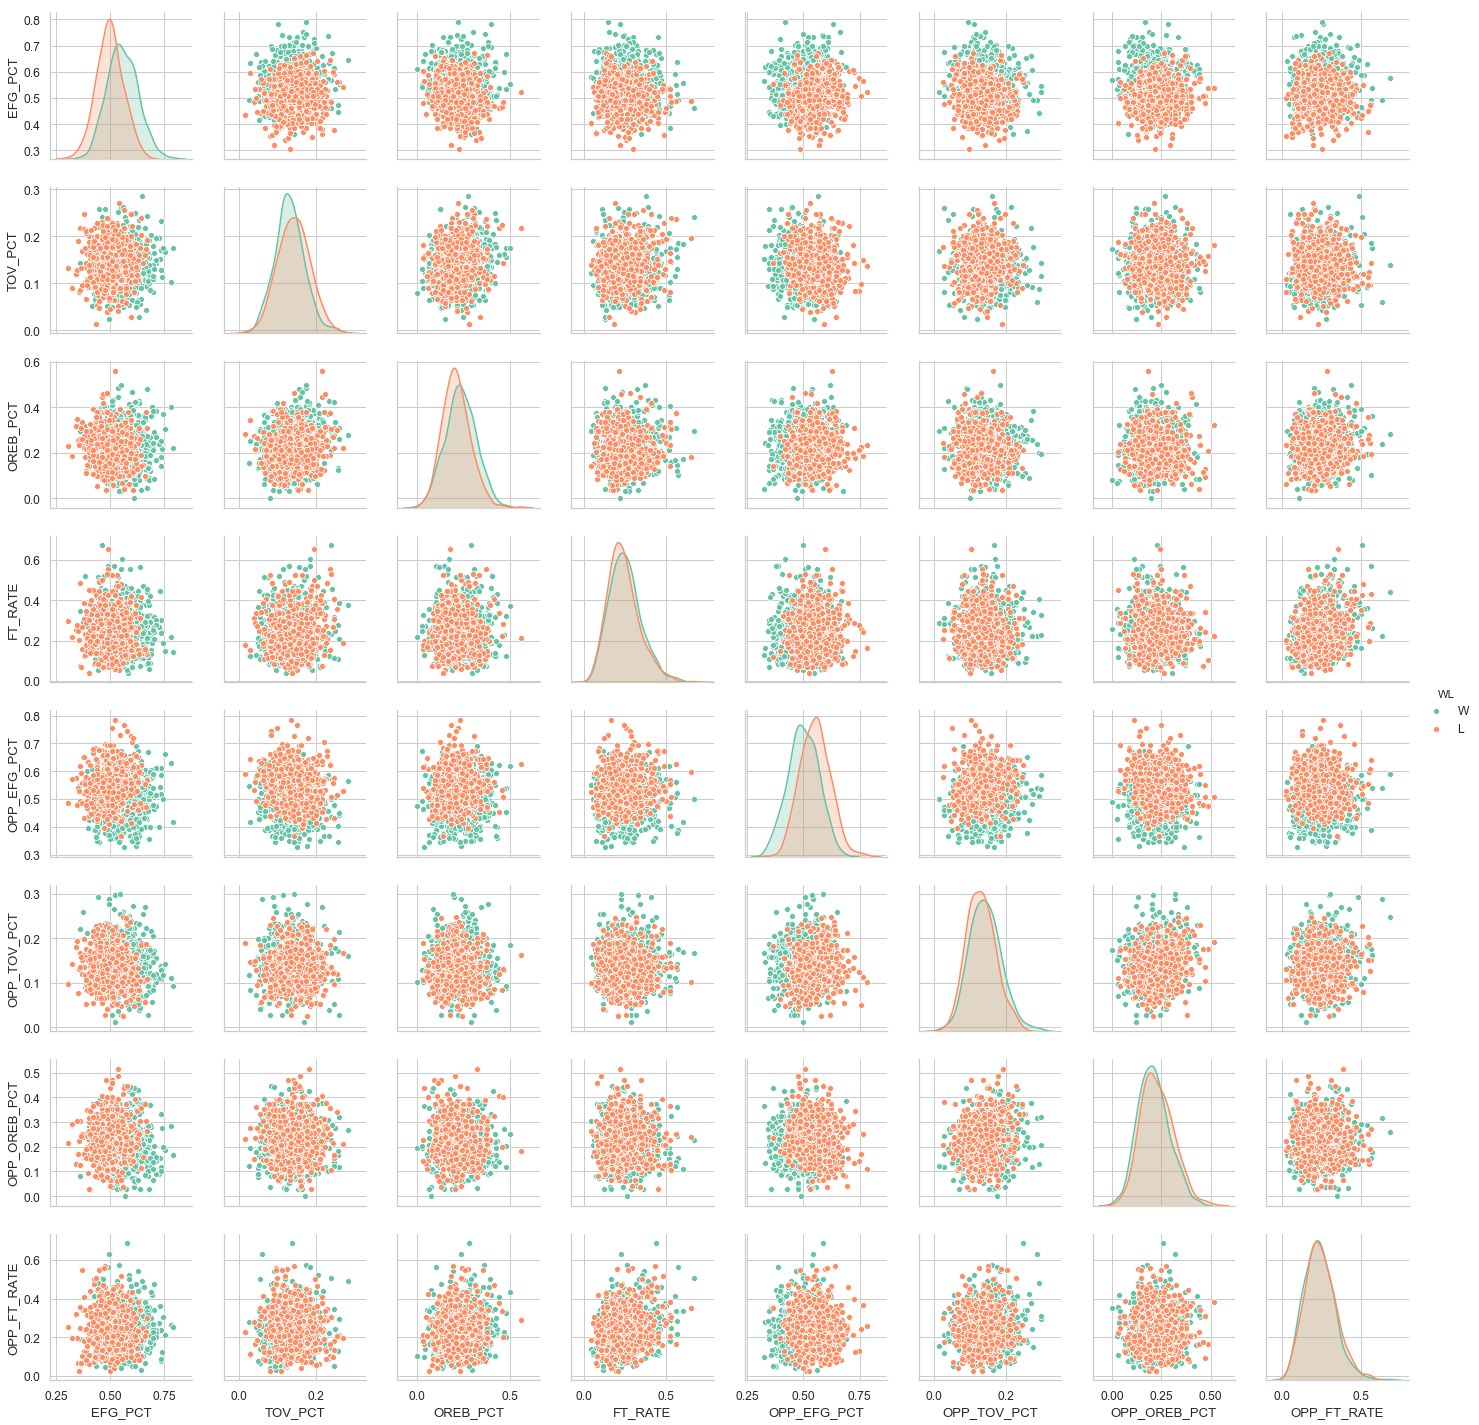

In [52]:
four_factor_feats = [
'WL',
'EFG_PCT', 'TOV_PCT', 'OREB_PCT', 'FT_RATE',
'OPP_EFG_PCT', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'OPP_FT_RATE',
]    

eda_pair_df = eda_df[four_factor_feats]
fig = plt.figure(figsize=(16,8))
sns.pairplot(eda_pair_df, kind='scatter', hue='WL', palette="Set2")

# REVIEW

#### Pairplot Takeaway

    1. Looking across the diagonal from (0,0) to (4,4), there is a noticeable difference in means for NET Rebounds & Net Assists, with winning outcomes having higher NET Rebounds & Assists
    2.  Again, looking across the diagonal, there is very little difference in NET Turnovers, Steals, & Blocks with respect to the outcome of the game.

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

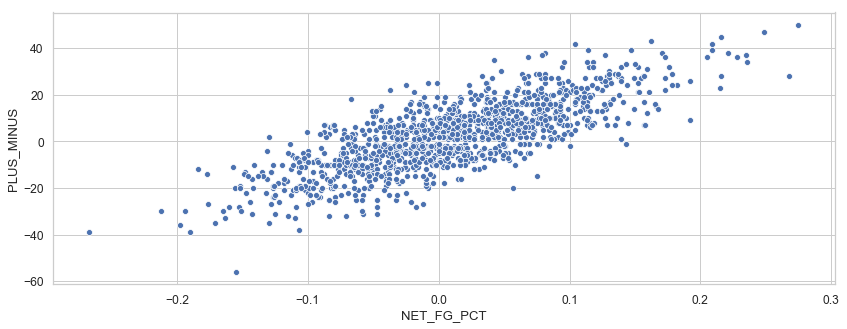

In [130]:
sns.scatterplot(x='NET_FG_PCT', y='PLUS_MINUS', data=eda_df)

### Swarm Plot

#### Helper Function

In [54]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

#### Interactive Plot

In [56]:
four_factor_feats = [
'WL',
'EFG_PCT', 'TOV_PCT', 'OREB_PCT', 'FT_RATE',
'OPP_EFG_PCT', 'OPP_TOV_PCT', 'OPP_OREB_PCT', 'OPP_FT_RATE',
]

@interact
def swarm_preview(feature = feature_names):
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [16, 6]})
    quantitative_summarized(dataframe= eda_df, y = 'WL', x = feature, palette="Set2", verbose=False, swarm=True)


# feature_names = ["NET_FG_PCT", "NET_FG3_PCT", "NET_FT_PCT", 
#                  "NET_OREB", "NET_DREB", "NET_REB", "NET_AST",
#                 "NET_TOV", "NET_STL", "NET_BLK", "NET_REB_PCT",
#                 "NET_EFG_PCT", "NET_TS_PCT", "NET_PF"]

# @interact
# def swarm_preview(feature = feature_names):
#     sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [16, 6]})
#     quantitative_summarized(dataframe= eda_df, y = 'WL', x = 'NET_FG_PCT', palette="Set2", verbose=False, swarm=True)

interactive(children=(Dropdown(description='feature', options=('FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PC…

### Heat Map (Annotated)

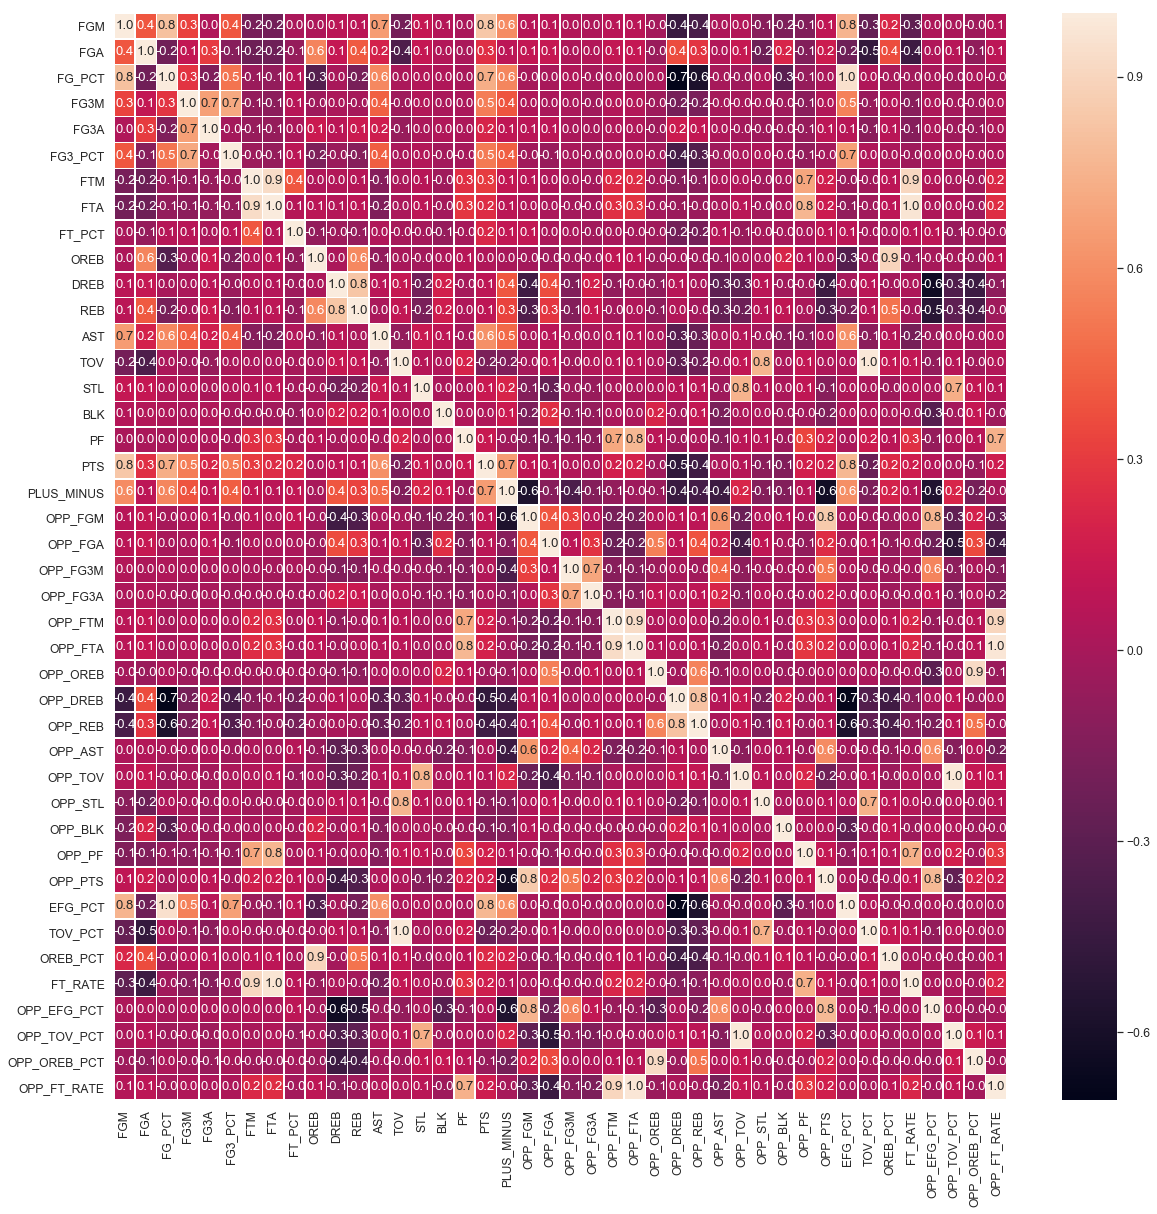

In [58]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(eda_df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()